In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

_ , (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [24]:
(x_test.shape, y_test.shape)
# Normalize the data
x_test = x_test.astype('float32') / 255.0
# Reshape the data to include the channel dimension
x_test = x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

In [25]:

# Part 8: Load the model
model = models.load_model('mnist_ffnn_model.h5')

# Part 9: Make predictions
pred_probs = model.predict(x_test)           # Shape: (10000, 10)
pred_probs.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step


(10000, 10)

In [26]:
predictions[0:2]

array([[0.0661343 , 0.06314018, 0.05019815, 0.10175155, 0.04252291,
        0.27403325, 0.06915529, 0.12310187, 0.13553455, 0.07442804],
       [0.06611922, 0.06311647, 0.05016869, 0.10173266, 0.04248832,
        0.2742462 , 0.06923395, 0.12282709, 0.13569352, 0.07437395]],
      dtype=float32)

In [27]:
print(tf.argmax(pred_probs[0:2], axis=1).numpy() ) 
pred_labels = tf.argmax(pred_probs, axis=1)  # Shape: (10000,)

[7 2]


Sample predictions:


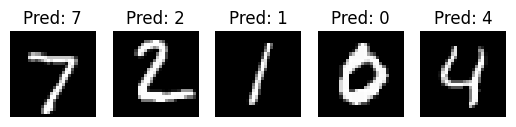

In [30]:
print("Sample predictions:")
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_labels[i].numpy()}")
    plt.axis('off')
plt.show()

In [29]:
print("Misclassified images count")
tf.where(pred_labels != y_test).numpy().flatten().shape

Misclassified images count


(220,)

Showing first 7 misclassified images


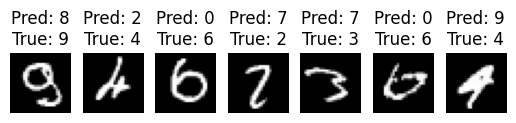

In [31]:
print("Showing first 7 misclassified images")
for i in range(7):
    plt.subplot(1, 7, i+1)
    idx = tf.where(pred_labels != y_test).numpy().flatten()[i]
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_labels[idx].numpy()}\nTrue: {y_test[idx]}")
    plt.axis('off')
plt.show()